In [56]:
import os
import glob
test_cum_path = sorted(glob.glob("./train_history_sentiment/cumulative_return/*"))[-1]
# test_cum_path = sorted(glob.glob("./train_history/cumulative_return/*"))[-1]
test_cum_path

'./train_history_sentiment/cumulative_return/cumu_return2023-05-30 14:10:59.csv'

In [57]:
import pandas as pd
from plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts
import pyfolio
from pyfolio import timeseries
# import warnings
# warnings.filterwarnings('ignore')

test_return_raw = pd.read_csv(test_cum_path)
# test_return_raw = pd.read_csv('try.csv')
#diff()/pct
test_return_raw.columns=['step','return']

test_return = (test_return_raw.pct_change())

print(len(test_return))
DRL_strat = convert_daily_return_to_pyfolio_ts(test_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func(returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")
print("==============DRL Strategy Stats===========")

perf_stats_all

241
==============DRL Strategy Stats===========


Annual return         -0.070261
Cumulative returns    -0.067300
Annual volatility      0.178034
Sharpe ratio          -0.322198
Calmar ratio          -0.378164
Stability              0.320454
Max drawdown          -0.185796
Omega ratio            0.948496
Sortino ratio         -0.455023
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.100334
Daily value at risk   -0.022658
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [ ]:
import pandas as pd
from plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts
import pyfolio
from pyfolio import timeseries
# import warnings
# warnings.filterwarnings('ignore')

test_return_raw = pd.read_csv('./train_history_sentiment/UBAH_test.csv')
# test_return_raw = pd.read_csv('try.csv')
#diff()/pct
test_return_raw.columns=['step','return']

test_return_a = (test_return_raw.pct_change())

print(len(test_return_a))
DRL_strat_a = convert_daily_return_to_pyfolio_ts(test_return_a)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func(returns=DRL_strat_a, 
                              factor_returns=DRL_strat_a, 
                                positions=None, transactions=None, turnover_denom="AGB")
print("==============DRL Strategy Stats===========")

perf_stats_all

In [14]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
         ticker="%5EGSPC",
#        ticker="TSLA",
        start='2022-01-01',
        end='2022-12-31')

stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (251, 9)


Start date,2022-01-18
End date,2022-12-30
Total months,11
,Backtest
Annual return,-14.1%
Cumulative returns,-13.6%
Annual volatility,18.5%
Sharpe ratio,-0.73
Calmar ratio,-0.61
Stability,0.55
Max drawdown,-23.3%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.52,2022-02-09,2022-09-29,NaT,NaN
1,2.82,2022-01-18,2022-01-25,2022-02-02,12
2,0.65,2022-02-02,2022-02-04,2022-02-09,6
3,0.00,2022-02-09,2022-02-09,2022-02-09,1
4,0.00,2022-02-09,2022-02-09,2022-02-09,1


/home/samuel/.conda/envs/finrl/lib/python3.8/site-packages/pyfolio/tears.py:925: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn('Passed returns do not overlap with any'


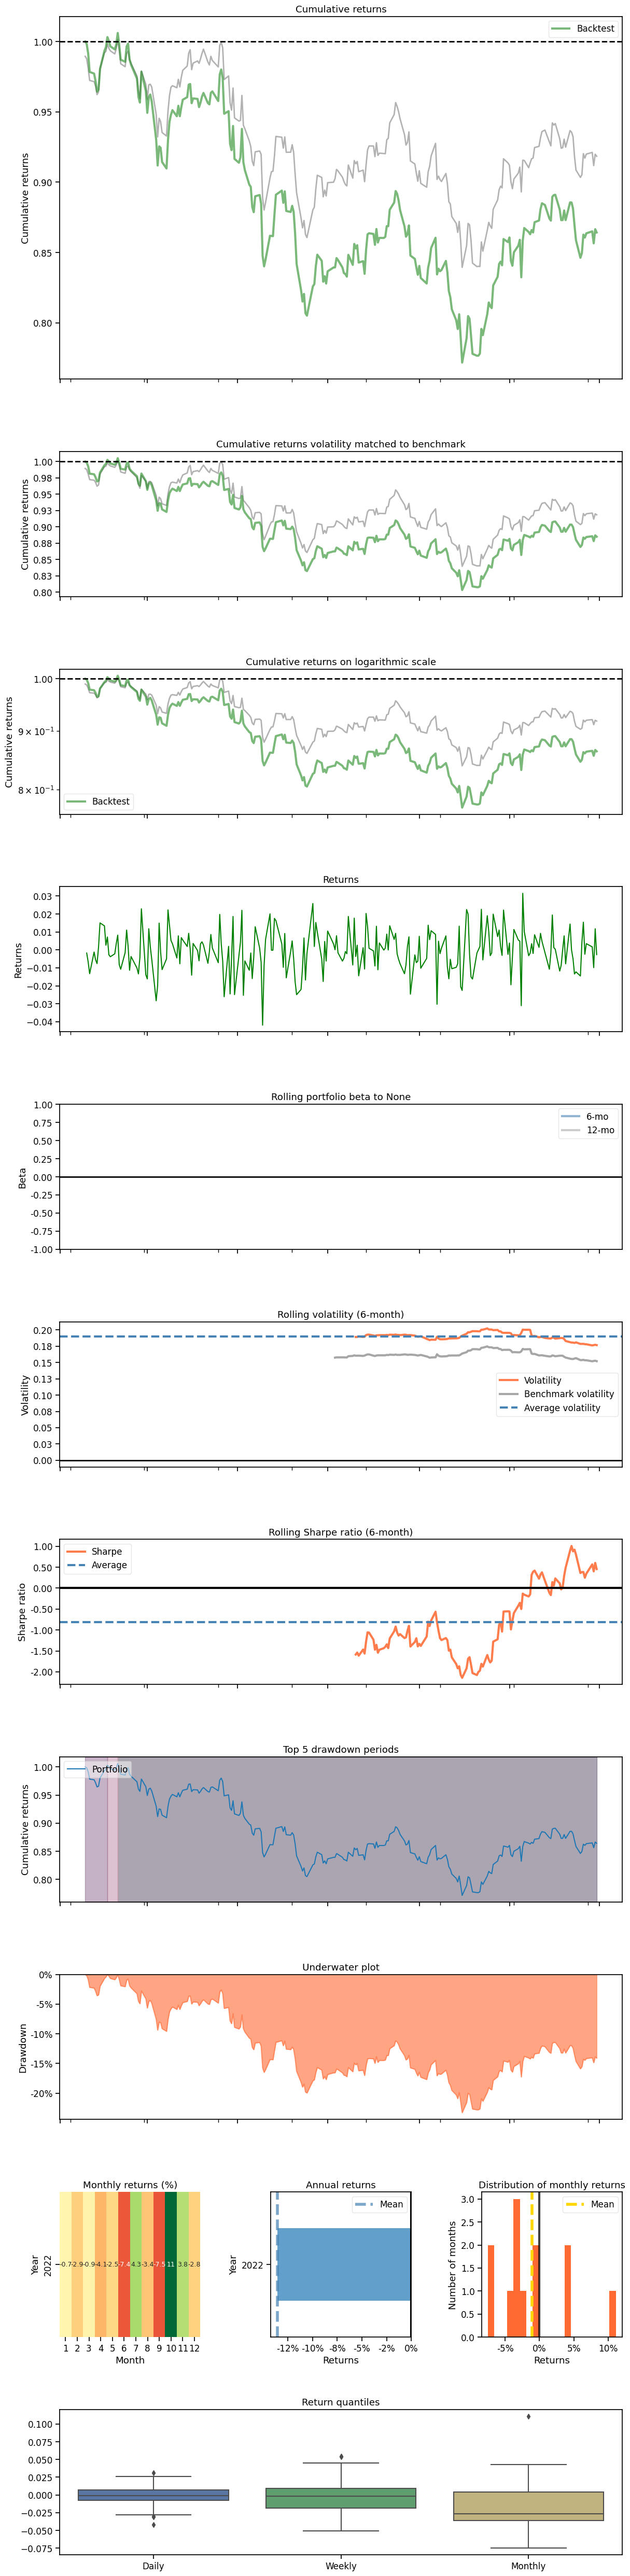

In [47]:
## import pyfolio
%matplotlib inline

baseline_df = get_baseline(
        ticker="%5EGSPC,", 
        start='2022-01-01',
        end='2022-12-31')

baseline_returns = get_daily_return(baseline_df, value_col_name="close")
DRL_strat.index = baseline_returns.index[len(baseline_returns)-len(DRL_strat):]
DRL_strat_a.index = baseline_returns.index[len(baseline_returns)-len(DRL_strat_a):]


with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = DRL_strat,
                                       benchmark_rets=DRL_strat_a, set_context=False)